# Step 1
### In this step the data is loaded and the 58th column is dropped because it was an empty column and 57th column is dropped from data and stored it in label as that's the column we need to predict

In [1]:
!pip install pandas
import pandas as pd
file_path = "spambase.data"
# above .data file is comma delimited
data = pd.read_csv(file_path)
data=data.drop(columns=['58'])
label=data['57']
data=data.drop("57",axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


# Step 2
### In this step all the modules necessary from sklearn are imported

In [8]:
!pip install sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
!pip install numpy
import numpy as np

# Step 3
### In this step a function is written to compute the ANOVA F-value for all the features in the given data, which is used in later steps.

In [6]:
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs




# Step 4
### In this steps 2 operations were done:
    1. The data is split into training data and test data where 30% of the data is put in the test data and the remaining is the train data.
    2. This splitted data is sent to the select_features function written in Step 3 to compute the F-values of the features

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,label,test_size=0.3)

X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))    


Feature 0: 53.395118
Feature 1: 2.998980
Feature 2: 146.713434
Feature 3: 11.395680
Feature 4: 211.586268
Feature 5: 205.775203
Feature 6: 438.071729
Feature 7: 134.197377
Feature 8: 179.047634
Feature 9: 77.672430
Feature 10: 159.498194
Feature 11: 0.022849
Feature 12: 57.601515
Feature 13: 15.142624
Feature 14: 141.069270
Feature 15: 249.649446
Feature 16: 240.368958
Feature 17: 151.712474
Feature 18: 254.472017
Feature 19: 143.174068
Feature 20: 557.988801
Feature 21: 28.633145
Feature 22: 406.841145
Feature 23: 197.995684
Feature 24: 237.770793
Feature 25: 195.344638
Feature 26: 113.067390
Feature 27: 95.049683
Feature 28: 71.420004
Feature 29: 100.428004
Feature 30: 52.882666
Feature 31: 43.718224
Feature 32: 57.573396
Feature 33: 44.248088
Feature 34: 71.698357
Feature 35: 62.034506
Feature 36: 109.184136
Feature 37: 3.386501
Feature 38: 54.322080
Feature 39: 11.936257
Feature 40: 26.658199
Feature 41: 61.459365
Feature 42: 56.612172
Feature 43: 28.743614
Feature 44: 62.479213
Fe

# Step 5
### In this step after splitting the data Knn classification is done for K= 1 to 40 neighbours and a graph between error rate and K is plotted.

Text(0, 0.5, 'Error Rate')

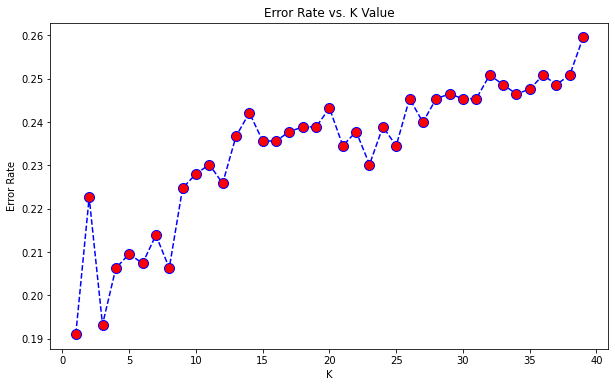

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,label,test_size=0.2)
error_rate = []
for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,Y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



# Step 6
### Converted the data and label to numpy for K-fold cross validation

In [11]:
data=data.to_numpy()
data.shape

(4601, 57)

In [12]:
label=label.to_numpy()

# Step 7
### In this step two functions are written:
        1. get_matrix: To calculate the confusion matrix for the model
        2. get_score: To calculate the accuracy of the model

In [13]:
from sklearn.metrics import confusion_matrix
def get_matrix(model,X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    return confusion_matrix(Y_test,model.predict(X_test))
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)
 

# Step 8
### Following operations are done:
        1. For performing K-fold cross validation folds is initialized with K = 10. The value for k is fixed to 10, a value that has been found through experimentation to generally result in a model skill estimate with low bias a modest variance
        2. We are calculating scores for Logistic Regression, SVM, Random forest classifier, Naive Bayes and K nearest neighbours(neighbours=4) by changing the train and text index according to the folds.
        3. From the results we can see that Random Forest classifier is the best of all.

In [16]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
KClassifier = KNeighborsClassifier(n_neighbors=4)
scores_logistic = []
scores_svm = []
scores_rf = []
scores_NB=[]
scores_KNN=[]
error_rate=[]
matrix_rf=[]
matrix_RF=[]
for train_index, test_index in folds.split(data,label):
    X_train, X_test, y_train, y_test = data[train_index], data[test_index], \
                                       label[train_index], label[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))
    scores_NB.append(get_score(GaussianNB(), X_train, X_test, y_train, y_test))
    scores_KNN.append(get_score(KClassifier, X_train, X_test, y_train, y_test))
    
print("Scores: Logistic Regression")    
print(scores_logistic)
print("")
                     
                         
print("Scores: SVM ")    
print(scores_svm)
print("")
                     
                         
print("Scores: Random Forest Classifier")    
print(scores_rf)
print("")
                     
                     
                         
print("Scores: Naive Bayes")    
print(scores_NB)
print("")
                     
                         
print("Scores: KNearestNeighbour")    
print(scores_KNN)
print("")

    
    
    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Scores: Logistic Regression
[0.93058568329718, 0.9282608695652174, 0.9173913043478261, 0.9456521739130435, 0.9369565217391305, 0.9304347826086956, 0.9521739130434783, 0.9391304347826087, 0.85, 0.8391304347826087]

Scores: SVM 
[0.7787418655097614, 0.8, 0.8152173913043478, 0.8456521739130435, 0.8152173913043478, 0.8565217391304348, 0.8347826086956521, 0.8456521739130435, 0.75, 0.8021739130434783]

Scores: Random Forest Classifier
[0.9501084598698482, 0.9434782608695652, 0.9369565217391305, 0.9565217391304348, 0.9608695652173913, 0.9608695652173913, 0.9652173913043478, 0.9695652173913043, 0.8978260869565218, 0.8521739130434782]

Scores: Naive Bayes
[0.8438177874186551, 0.8630434782608696, 0.8782608695652174, 0.8673913043478261, 0.8847826086956522, 0.8282608695652174, 0.8326086956521739, 0.8673913043478261, 0.6347826086956522, 0.717391304347826]

Scores: KNearestNeighbour
[0.7483731019522777, 0.782608695652174, 0.7760869565217391, 0.7891304347826087, 0.8108695652173913, 0.8282608695652174

# Step 9
### Confusion matrix for all the models is obtained

In [18]:
matrix_rf=[]
matrix_RF=[]
matrix_nb=[]
matrix_NB=[]
matrix_knn=[]
matrix_KNN=[]
matrix_lr=[]
matrix_LR=[]
matrix_svm=[]
matrix_SVM=[]
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(data,label):
    X_train, X_test, y_train, y_test = data[train_index], data[test_index], \
                                       label[train_index], label[test_index]
    matrix_rf=get_matrix(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test)
    matrix_RF.append(matrix_rf)
    
    matrix_nb=get_matrix(GaussianNB(), X_train, X_test, y_train, y_test)
    matrix_knn=get_matrix(KClassifier, X_train, X_test, y_train, y_test)
    matrix_NB.append(matrix_nb)
    matrix_KNN.append(matrix_knn)
    
    matrix_lr=get_matrix(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test)
    matrix_svm=get_matrix(SVC(gamma='auto'), X_train, X_test, y_train, y_test)
    
    matrix_LR.append(matrix_lr)
    matrix_SVM.append(matrix_svm)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Step 10
### In this step the error rate, false positive and false negative rate for all the folds is calculated. And also the average error rate for RandomForestClassifier across all folds is computed

In [43]:

def calculate_number(matrix,str):

    data=[]
    total_error_rate=0
    for i in range (0,len(matrix)):
        data.append([]) 
        data[i].append(i+1)
        data[i].append(matrix[i][0][1])
        data[i].append(matrix[i][1][0])
        sum=data[i][1]+data[i][2]
        total=matrix[i][0][1]+matrix[i][1][0]+matrix[i][0][0]+matrix[i][1][1]
        error_rate=sum/total
        data[i].append(error_rate)
        total_error_rate=total_error_rate+error_rate

    
    return data

def calculate_rate(matrix,str):
    
    data_rate=[]
    total_error_rate=0
    
    for i in range (0,len(matrix)):
        data_rate.append([]) 
        sum=matrix[i][0][1]+matrix[i][1][0]
        total=matrix[i][0][1]+matrix[i][1][0]+matrix[i][0][0]+matrix[i][1][1]
        error_rate=sum/total
        total_error_rate=total_error_rate+error_rate
        actual_no=matrix[i][0][1]+matrix[i][0][0]
        actual_yes=matrix[i][1][0]+matrix[i][1][1]
        data_rate[i].append(i+1)
        fp_rate=matrix[i][0][1]/actual_no
        fn_rate=matrix[i][1][0]/actual_yes
        data_rate[i].append(fp_rate)
        data_rate[i].append(fn_rate)
        data_rate[i].append(error_rate)
        
        if str == 'rf' and i == len(matrix)-1:
            average_error_rate=total_error_rate/10
            data_rate.append([])
            data_rate[i+1].append('average_error_rate')
            data_rate[i+1].append('-')
            data_rate[i+1].append('-')
            data_rate[i+1].append(average_error_rate)
            
    return data_rate


In [44]:
data_lr=calculate_number(matrix_LR,'lr')
data_knn=calculate_number(matrix_KNN,'knn')
data_rf=calculate_number(matrix_RF,'rf')
data_nb=calculate_number(matrix_NB,'nb')
data_svm=calculate_number(matrix_SVM,'svm')

data_rate_lr=calculate_rate(matrix_LR,'lr')
data_rate_knn=calculate_rate(matrix_KNN,'knn')
data_rate_rf=calculate_rate(matrix_RF,'rf')
data_rate_nb=calculate_rate(matrix_NB,'nb')
data_rate_svm=calculate_rate(matrix_SVM,'svm')



# Step 11
### In this step false positives, false negatives are printed for all the folds of all models except RandomForest along with the error rate. 

In [45]:

from tabulate import tabulate

print("--------LOGISTIC REGRESSION-------")
print(" ")
print (tabulate(data_lr, headers=["Fold","False Positive", "False Negative", "Error rate"]))
print(" ")
print (tabulate(data_rate_lr, headers=["Fold","False Positive rate", "False Negative rate", "Error rate"]))
print("")

print("--------KNearestNeighbour-------")
print(" ")
print (tabulate(data_knn, headers=["Fold","False Positive", "False Negative", "Error rate"]))
print(" ")
print (tabulate(data_rate_knn, headers=["Fold","False Positive rate", "False Negative rate", "Error rate"]))
print("")




print("--------Naive Bayes-------")
print(" ")
print (tabulate(data_nb, headers=["Fold","False Positive", "False Negative", "Error rate"]))
print(" ")
print (tabulate(data_rate_nb, headers=["Fold","False Positive rate", "False Negative rate", "Error rate"]))
print("")




print("--------SVM-------")
print(" ")
print (tabulate(data_svm, headers=["Fold","False Positive", "False Negative", "Error rate"]))
print(" ")
print (tabulate(data_rate_svm, headers=["Fold","False Positive rate", "False Negative rate", "Error rate"]))
print("")




--------LOGISTIC REGRESSION-------
 
  Fold    False Positive    False Negative    Error rate
------  ----------------  ----------------  ------------
     1                 8                24     0.0694143
     2                10                23     0.0717391
     3                16                22     0.0826087
     4                12                13     0.0543478
     5                13                16     0.0630435
     6                22                10     0.0695652
     7                 4                18     0.0478261
     8                12                16     0.0608696
     9                43                26     0.15
    10                37                37     0.16087
 
  Fold    False Positive rate    False Negative rate    Error rate
------  ---------------------  ---------------------  ------------
     1              0.0286738              0.131868      0.0694143
     2              0.0359712              0.126374      0.0717391
     3          

# Step 12
### In this step false positives, false negatives are printed for all the folds of RandomForest along with the error rate and average error rate . 

In [49]:


print("--------The Best Performing Model is RandomForestClassifier-------")
print(" ")
print (tabulate(data_rf, headers=["Fold","False Positive", "False Negative", "Error rate"]))
print(" ")
print (tabulate(data_rate_rf, headers=["Fold","False Positive rate", "False Negative rate", "Error rate"]))







--------The Best Performing Model is RandomForestClassifier-------
 
  Fold    False Positive    False Negative    Error rate
------  ----------------  ----------------  ------------
     1                 7                20     0.0585683
     2                 7                16     0.05
     3                 4                26     0.0652174
     4                 6                21     0.0586957
     5                 5                16     0.0456522
     6                13                 8     0.0456522
     7                 3                14     0.0369565
     8                 3                 9     0.026087
     9                35                17     0.113043
    10                31                35     0.143478
 
Fold                False Positive rate    False Negative rate      Error rate
------------------  ---------------------  ---------------------  ------------
1                   0.025089605734767026   0.10989010989010989       0.0585683
2               